<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

������ ������� ��࠭��: 1251


"nvidia-smi" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


## Import Libs

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"


# import libs
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch import nn

2.2.2+cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

* photo analyzing
* object detection on sphotos


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In common sense it is a situation when a ML algoritm get excelent succes on train set and worse reults on a test set.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* regularization
* more data
* augmation data

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

![image.png](attachment:image.png)

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
train_data = datasets.MNIST("my_data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST("my_data", train=False, download=True, transform=ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:01<00:00, 6355803.20it/s] 


Extracting my_data\MNIST\raw\train-images-idx3-ubyte.gz to my_data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 210237.50it/s]


Extracting my_data\MNIST\raw\train-labels-idx1-ubyte.gz to my_data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 2061286.81it/s]


Extracting my_data\MNIST\raw\t10k-images-idx3-ubyte.gz to my_data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 4539082.38it/s]

Extracting my_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to my_data\MNIST\raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

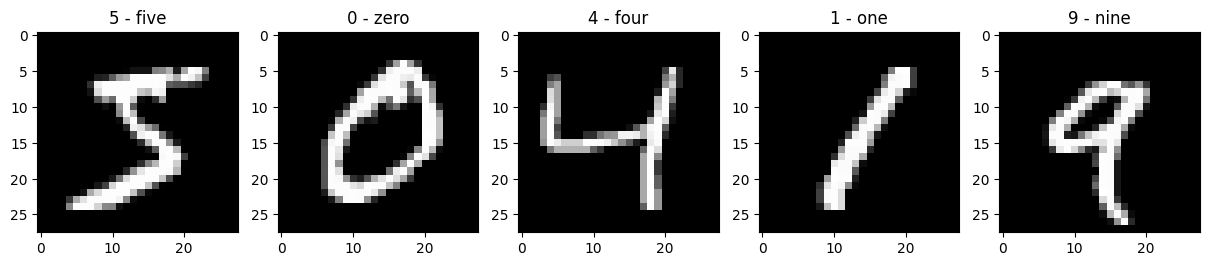

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 30))

for i in range(5):
    img, label = train_data[i]
    fig.add_subplot(1, 5, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

print(f"DataLoaders:", {train_dataloader, test_dataloader})
print(f"Length of train dataloader {len(train_dataloader)} batch size {BATCH_SIZE}")
print(f"Length of test dataloader {len(test_dataloader)} batch size {BATCH_SIZE}")

DataLoaders: {<torch.utils.data.dataloader.DataLoader object at 0x000002A25CECBCD0>, <torch.utils.data.dataloader.DataLoader object at 0x000002A262651F70>}
Length of train dataloader 1875 batch size 32
Length of test dataloader 313 batch size 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
class MinstDigigtsModelV1(nn.Module):

    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.b1 = nn.Sequential()

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?